In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt



In [38]:
def get_cross_entropy_results(window_size, network, strategy, optimizer_name = 'Adam_lr_2e-06'):
    from sklearn.metrics import roc_auc_score
    percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
    general_auc_knn = []
    general_auc_svm = []
    general_auc_rf = []
    general_auc_top = []
    general_auc_all = []
    general_std_knn = []
    general_std_svm = []
    general_std_rf = []
    general_std_top = []
    general_std_all = []
    for percentage in percentages:
        base_path = '/home/yesid08/Baselines/Experiments/clasical_learning/{}/{}/{}/{}/{}/{}/results'.format(
            window_size,
            'cross_entropy',
            optimizer_name,
            network,
            strategy,
            percentage
        )
        aucs_knn = []
        aucs_svm = []
        aucs_rf = []
        aucs_top = []
        aucs_all = []
        
        for fold in range(1,6):
            kfold_csv = pd.read_csv(base_path+'/kfold_results_{}.csv'.format(fold))
            kfold_csv = kfold_csv[kfold_csv['folds']== 'test']
            aucs_top.append( roc_auc_score(kfold_csv['labels'], kfold_csv['probs']) )
        general_auc_top.append( np.mean(aucs_top) )
        general_std_top.append( np.std(aucs_top) )

    result = {
        'top': {
            'auc_std': general_std_top,
            'auc_mean': general_auc_top
        },

    }
    return result

In [39]:
def get_contrastive_results(window_size, contrastive_loss, network, strategy, optimizer_name = 'RMSprop_mom_0.6_lr_1e-06'):
    from sklearn.metrics import roc_auc_score
    percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
    general_auc_knn = []
    general_auc_svm = []
    general_auc_rf = []
    general_auc_top = []
    general_auc_all = []
    general_std_knn = []
    general_std_svm = []
    general_std_rf = []
    general_std_top = []
    general_std_all = []
    for percentage in percentages:
        base_path = '/home/yesid08/Experiments/contrastive_learning/{}/{}/{}/{}/{}/{}/results'.format(
            window_size,
            contrastive_loss,
            optimizer_name,
            network,
            strategy,
            percentage
        )
        aucs_knn = []
        aucs_svm = []
        aucs_rf = []
        aucs_top = []
        aucs_all = []
        
        for fold in range(1,6):
            kfold_csv = pd.read_csv(base_path+'/kfold_results_{}.csv'.format(fold))
            kfold_csv = kfold_csv[kfold_csv['folds']== 'test']
            aucs_top.append( roc_auc_score(kfold_csv['labels'], kfold_csv['svm_probs']) )
        general_auc_top.append( np.mean(aucs_top) )
        general_std_top.append( np.std(aucs_top) )

    result = {
        'top': {
            'auc_std': general_std_top,
            'auc_mean': general_auc_top
        },

    }
    return result

In [40]:

strategy = 'reduce_negatives'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy)
contrastive_loss = 'TripletLoss_ts_ephn_m_0.05'
baseline_2 = get_contrastive_results(window_size, contrastive_loss, model, strategy)
contrastive_loss = 'NTXentLoss_T_0.07'
model='mertash1024'
baseline_3 = get_contrastive_results(window_size, contrastive_loss, model, strategy)

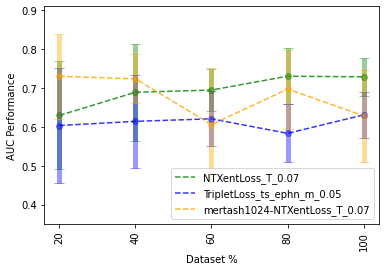

In [46]:
percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

color = 'blue'
plt.plot(baseline_2[classifier]['auc_mean'], 
         label='TripletLoss_ts_ephn_m_0.05', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_2[classifier]['auc_mean'],
             yerr=baseline_2[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'orange'
plt.plot(baseline_3[classifier]['auc_mean'], 
         label='mertash1024-NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_3[classifier]['auc_mean'],
             yerr=baseline_3[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')

In [42]:
baseline_1

{'top': {'auc_std': [0.21235904867830696,
   0.08495133247270983,
   0.05933004672545309,
   0.06860777409788678,
   0.04859017962053191],
  'auc_mean': [0.5863833333333334,
   0.6907333333333334,
   0.6986166666666668,
   0.7437000000000001,
   0.7289166666666667]}}

In [49]:
strategy = 'reduce_positives'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy)
contrastive_loss = 'TripletLoss_ts_ephn_m_0.05'
baseline_2 = get_contrastive_results(window_size, contrastive_loss, model, strategy)
contrastive_loss = 'NTXentLoss_T_0.07'
model='mertash1024'
#baseline_3 = get_contrastive_results(window_size, contrastive_loss, model, strategy)

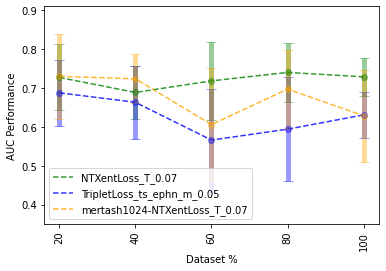

In [50]:
percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

color = 'blue'
plt.plot(baseline_2[classifier]['auc_mean'], 
         label='TripletLoss_ts_ephn_m_0.05', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_2[classifier]['auc_mean'],
             yerr=baseline_2[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'orange'
plt.plot(baseline_3[classifier]['auc_mean'], 
         label='mertash1024-NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_3[classifier]['auc_mean'],
             yerr=baseline_3[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')

In [48]:
baseline_1

{'top': {'auc_std': [0.08508933867151368,
   0.06729903416840394,
   0.09968653648088867,
   0.07652961663449144,
   0.04859017962053191],
  'auc_mean': [0.7272666666666667,
   0.6886333333333334,
   0.7184166666666667,
   0.7401333333333333,
   0.7289166666666667]}}

In [ ]:
percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

color = 'blue'
plt.plot(baseline_2[classifier]['auc_mean'], 
         label='TripletLoss_ts_ephn_m_0.05', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_2[classifier]['auc_mean'],
             yerr=baseline_2[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)


color = 'orange'
plt.plot(baseline_3[classifier]['auc_mean'], 
         label='mertash1024-NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_3[classifier]['auc_mean'],
             yerr=baseline_3[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')

In [43]:
strategy = 'stratified'
window_size = '12_32_32'
model = 'mertash512'
contrastive_loss = 'NTXentLoss_T_0.07'
baseline_1 = get_contrastive_results(window_size, contrastive_loss, model, strategy)
contrastive_loss = 'TripletLoss_ts_ephn_m_0.05'
baseline_2 = get_contrastive_results(window_size, contrastive_loss, model, strategy)
contrastive_loss = 'NTXentLoss_T_0.07'
model='mertash1024'
#baseline_3 = get_contrastive_results(window_size, contrastive_loss, model, strategy)

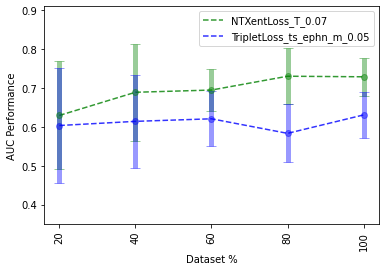

In [44]:
percentages = ['20', '40', '60', '80', '100']
indexes = np.arange(len(percentages))
classifier = 'top'
color = 'green'
plt.plot(baseline_1[classifier]['auc_mean'], 
         label='NTXentLoss_T_0.07', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_1[classifier]['auc_mean'],
             yerr=baseline_1[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

color = 'blue'
plt.plot(baseline_2[classifier]['auc_mean'], 
         label='TripletLoss_ts_ephn_m_0.05', color=color, alpha=0.8, linestyle='--')
plt.errorbar(indexes, baseline_2[classifier]['auc_mean'],
             yerr=baseline_2[classifier]['auc_std'],
             fmt='o', color = color, alpha=0.4, ecolor=color, elinewidth=5, capsize=5)

plt.xlabel('Dataset %')
plt.ylabel('AUC Performance')
plt.ylim([0.35, 0.91])
plt.xticks(indexes, percentages, rotation=90)
plt.legend(loc='best')

In [45]:
baseline_1

{'top': {'auc_std': [0.13913047832879752,
   0.1250859659949464,
   0.05325727910603186,
   0.07263620156490687,
   0.04859017962053191],
  'auc_mean': [0.6293500000000001,
   0.68905,
   0.6948000000000001,
   0.7303999999999999,
   0.7289166666666667]}}